# **MSP Projekt 2022**
### Daša Nosková - xnosko05
##### Piatok 10:00 


In [139]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
import scipy.stats as sp

# Úloha 1

IDK ASI ANOVA jednofaktorova podla mesta \\
H0: p1 = p2 = ... = pk = p

# Úloha 2
regresny model sa da zapisat v tvare Y = XB + e.

In [137]:
# data
Z = np.array([-24.62, -17.71, 15.57, 104.46, 22.48, 82.45, 121.34,
              76.68, 110.89, 93.31, 35.83, 87.97, 79.37, 138.35,
              -20.46, 74.53, 74.86, 94.28, 180.71, 101.12, 271.9, 203.8,
              -14.6, 115.39, 156.48, 189.47, 124.65, 366.66, 206.78,
              93.54, 189.22, 201.91, 304.64, 202.01, 367.64, 254.81,
              226.32, 346.02, 390.5, 444.94, 392.08, 424.95, 427.82,
              361.1, 454.58, 515.45, 443.66, 535.12, 551.86, 585.76,
              624.78, 559.12, 571.72, 589.11, 622.54, 706.7, 687.63,
              691.85, 703.73, 751.03, 789.6, 804.41, 806.21, 828.83,
              815.46, 987.89, 856.17, 894.29, 923.28, 940.97])

X = np.array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.22, 
              2.22, 2.22, 2.22, 2.22, 2.22, 2.22,
              4.44, 4.44, 4.44, 4.44, 4.44, 4.44, 4.44,
              6.67, 6.67, 6.67, 6.67, 6.67, 6.67, 6.67,
              8.89, 8.89, 8.89, 8.89, 8.89, 8.89, 8.89,
              11.11, 11.11, 11.11, 11.11, 11.11, 11.11, 11.11,
              13.33, 13.33, 13.33, 13.33, 13.33, 13.33, 13.33,
              15.56, 15.56, 15.56, 15.56, 15.56, 15.56, 15.56,
              17.78, 17.78, 17.78, 17.78, 17.78, 17.78, 17.78,
              20.00, 20.00, 20.00, 20.00, 20.00, 20.00, 20.00,
              ])

Y = np.array([0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00,
              1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67,
              3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33,
              5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00,
              6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67,
              8.33,10.00,0.00,1.67,3.33,5.00,6.67,8.33,10.00,
              0.00,1.67, 3.33,5.00,6.67,8.33,10.00,0.00,1.67,
              3.33,5.00,6.67,8.33,10.00,0.00,1.67,3.33,5.00,
              6.67,8.33,10.00,
              ])

xx = np.linspace(np.min(X)-5, np.max(X)+5, 70)
yy = np.linspace(np.min(Y)-5, np.max(Y)+5, 70)
zz = np.linspace(np.min(Z)-5, np.max(Z)+5, 70)


models = {}

In [142]:
def create_model(*params):
    F = np.column_stack((params))
    F = sm.add_constant(F)
    model = sm.OLS(Z, F).fit()
    print(model.summary())
    return model

def predict(model, *params):
    predict_values = np.column_stack((params))
    predict_values = sm.add_constant(predict_values)
    z_prediction = model.predict(predict_values)
    z_prediction=np.expand_dims(z_prediction,axis=0)
    return z_prediction

def plot_z(ax, X,Y,Z, label=None, color='blue', alpha=0.5):
    z = ax.scatter(X, Y, Z, color=color, alpha=alpha)
    z.set_label(label)
    ax.view_init(15, 100)

def plot_surface(ax, xx,yy, z_prediction):
    x_surf, y_surf = np.meshgrid(xx, yy)
    #z_surf = z(x_surf,y_surf, model.params)
    fig = ax.plot_wireframe(x_surf,y_surf,z_prediction, color='green', alpha=0.2,rstride=10, cstride=10,)
    fig.set_label('Predicted surface')

def plot_model(model, z_prediction):
    fig = plt.figure(figsize=(10, 10), dpi=100, layout='tight')
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title('Model')
    plot_surface(ax, X,Y, z_prediction)
    plot_z(ax,X,Y,Z, label='z', color='red', alpha=0.5)
    plot_z(ax, X,Y, z_prediction, label='predicted z', color='blue', alpha=0.3)

    #ax_surf = fig.add_subplot(1, 2, 2, projection='3d')
    #ax_surf.set_xlabel("X")
    #ax_surf.set_ylabel("Y")
    #ax_surf.set_zlabel("Z")
    #ax_surf.set_title('Predicted surface')
    #z_surf = predict(model,*model_params)
    #plot_surface(ax_surf, xx,yy, z_surf)
    #plot_z(ax_surf,xx,yy,Z,label='z', color='red', alpha=0.5)

    ax.legend(loc="best")
    fig.show()

def regression(*model_params, **plot_params):
    model = create_model(*model_params)
    z_prediction = predict(model,*model_params)
    plot_model(model, z_prediction)
    return model

## model Z = B1 + B2X + B3Y + B4X^2 + B5Y^2 + B6XY  
urobit este zavery..

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     411.6
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           3.04e-47
Time:                        17:24:26   Log-Likelihood:                -373.91
No. Observations:                  70   AIC:                             759.8
Df Residuals:                      64   BIC:                             773.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.3910     25.298     -0.529      0.5

/tmp/ipykernel_5401/599453088.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


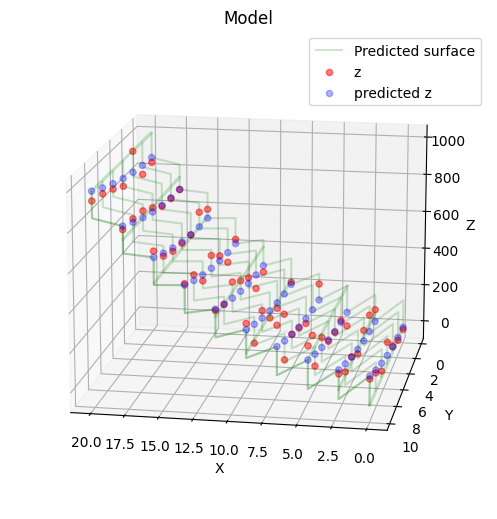

In [151]:

modelB6 = regression(*(X,Y,X**2,Y**2,Y*X))
models['B6']=modelB6

F = np.column_stack((X,Y,X**2,Y**2,Y*X))
F = sm.add_constant(F)
H = np.dot(np.transpose(F),F)
G = np.dot(np.transpose(F),Z)
B = np.dot(np.linalg.inv(H),G)
print(B)


## model Z = B1 + B2X + B3Y + B4X^2 + B5Y^2  

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   70
Model:                            GLM   Df Residuals:                       65
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          2753.4
Method:                          IRLS   Log-Likelihood:                -373.95
Date:                Sat, 26 Nov 2022   Deviance:                   1.7897e+05
Time:                        17:08:36   Pearson chi2:                 1.79e+05
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4663     20.337     -0.465      0.6

/tmp/ipykernel_5401/2293592028.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


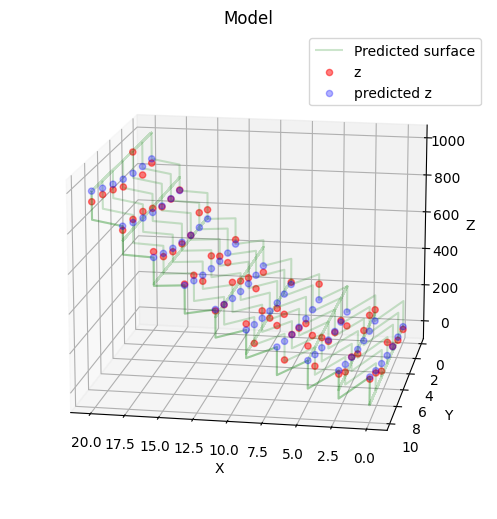

In [134]:
model_params = lambda x,y : (x,y,x**2,y**2)
modelB5 = regression(*(X,Y,X**2,Y**2))
models['B5']=modelB5

## model Z = B1 + B2X + B3Y + B4X^2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     678.6
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.62e-49
Time:                        15:55:07   Log-Likelihood:                -375.33
No. Observations:                  70   AIC:                             758.7
Df Residuals:                      66   BIC:                             767.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.0729     18.429     -1.306      0.1

/tmp/ipykernel_5401/2393947028.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


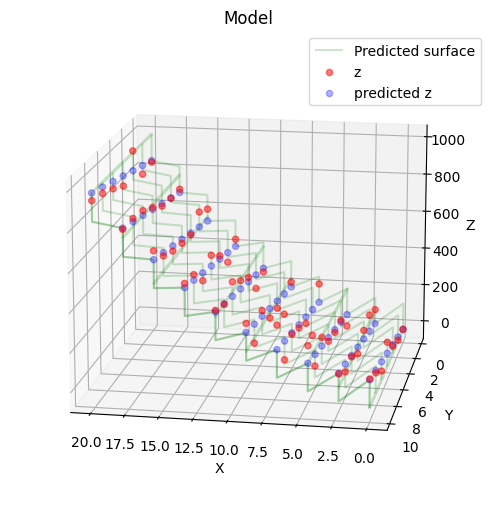

In [80]:

modelB4 = regression(*(X,Y,X**2))
models['B4']=modelB4

## model Z = B1 + B2X + B3Y

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     379.3
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           2.90e-37
Time:                        15:55:07   Log-Likelihood:                -408.56
No. Observations:                  70   AIC:                             823.1
Df Residuals:                      67   BIC:                             829.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -131.2278     24.189     -5.425      0.0

/tmp/ipykernel_5401/2393947028.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


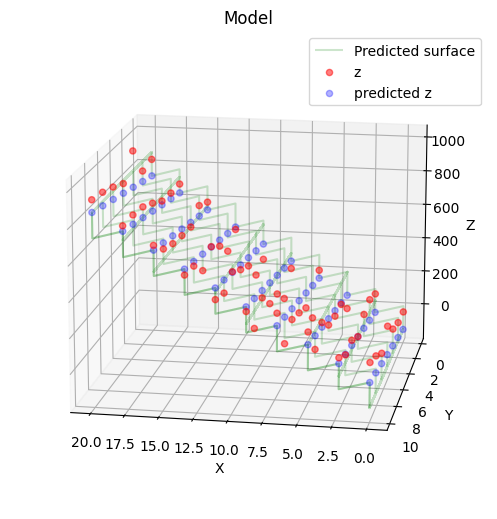

In [81]:

modelB3 = regression(*(X,Y))
models['B3']=modelB3


## model Z = B1 + B2X

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     564.3
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.21e-34
Time:                        15:55:08   Log-Likelihood:                -418.41
No. Observations:                  70   AIC:                             840.8
Df Residuals:                      68   BIC:                             845.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.3156     21.506     -2.805      0.0

/tmp/ipykernel_5401/2393947028.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


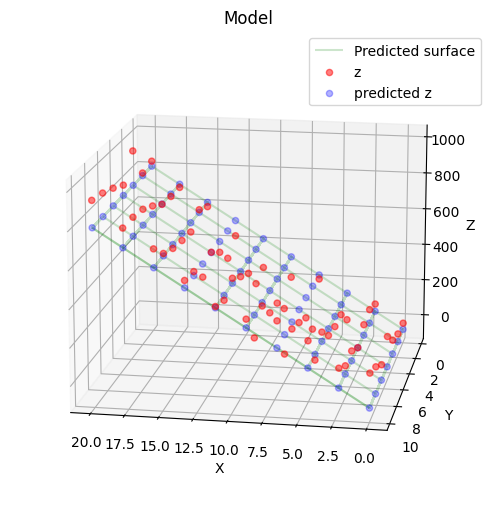

In [82]:
modelB2 = regression((X))
models['B2']=modelB2

## model Z = B1

/tmp/ipykernel_5401/2393947028.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


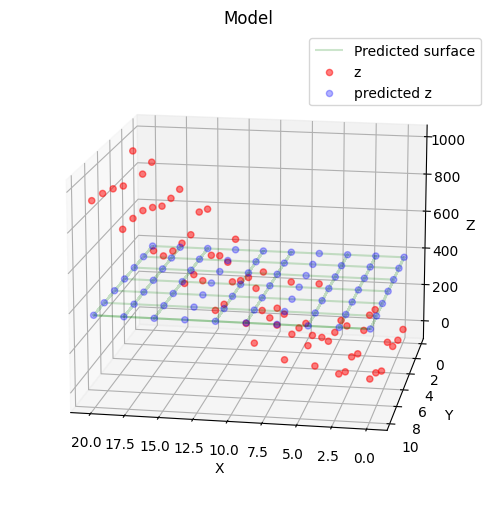

In [83]:
F = np.ones_like(X) # vector with ones
modelB1 = sm.OLS(Z, F).fit()
#print(modelB1.summary())
z_prediction = modelB1.predict(F)
z_prediction=np.expand_dims(z_prediction,axis=0)
plot_model(modelB1, z_prediction)
models['B1']=modelB1

# Porovnanie výsledkov modelov
Ako je vidieť nižšie, koeficienty determinace sú najvyššie pre modely B6, B5 a B4. Tieto modely najlepšie vystihujú dáta aj podľa vyššie zobrazených grafov. B5 je submodelom B6 a jeho graf ale aj koeficient determinace je skoro rovnaký ako pre model B6. Overíme hypotézy, že model B6 môžme zjednodušiť postupným testovaním parametrov modelu na 0. 

In [123]:
print('Koeficienty determinace pre jednotlivé modely')
for k, model in models.items():
    print(f"{k}: { model.rsquared}")


Koeficienty determinace pre jednotlivé modely
B6: 0.9698382643056537
B5: 0.9698053251584066
B4: 0.9685971204437828
B3: 0.9188413040687706
B2: 0.892454843670285
B1: -2.220446049250313e-16


# Hypotézy pre model Z = B1 + B2X + B3Y + B4X^2 + B5Y^2 + B6XY :
1. H: B6 = 0 HA: B6 != 0
2. H: B5 = 0 HA: B5 != 0

testovacie kritérium t = (bj - Bj0)/(s*srqt(vjj))

In [131]:

T_test = models['B6'].tvalues
print(T_test)

t = (models['B6'].params[5])

[-0.52932468  1.84517706  0.59757098 10.27504542  1.60115024 -0.26437355]
